In [ ]:
# test addresses list, now supersceded by the hospital dataset.
'''
addresses = [
    "King's Parade, Cambridge CB2 1SJ, UK",
    "Trinity College, Cambridge CB2 1TQ, UK",
    "24 Hills Road, Cambridge CB2 0QQ, UK",
    "St John's College, St John's St, Cambridge CB2 1TP, UK",
    "Parker's Piece, Cambridge CB1 1JF, UK",
    "The Clarendon Arms, 35 Clarendon Street, Cambridge CB1 1JX, UK",
    "5 Sidgwick Avenue, Cambridge CB3 9DA, UK",
    "10 West Road, Cambridge CB3 9DZ, UK",
    "Cambridge Science Centre, 44 Clifton Rd, Cambridge CB1 7ED, UK"]
'''  



In [34]:
# importing necessary libraries
import osmnx as ox
import networkx as nx
import folium
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
import pandas as pd
import numpy as np
import itertools
import math


In [ ]:
#coords_list = [geolocator.geocode(address).point[:2] for address in addresses]

In [ ]:
# hospital data function
# testing the workbook to take into account how to process data from hospital.csv for tsp use.

def hospital_data():
    hospitals = pd.read_csv('data/Hospital.csv',sep=',')
    hospitals = hospitals.dropna(subset=['County'])
    hospital = hospitals[(hospitals['City'].str.contains (city_or_county))].reset_index(drop = True)
    hospital['Address'] = hospital[['Address1','Address2','Address3']].astype(str).agg(', '.join,axis=1)
    #hospital['Address'] = hospital[['Address', 'coord','County']].astype(str).agg(', '.join, axis=1)
    hospital['Address'] = hospital['Address'].str.title() 
    hospital['Address'] = hospital['Address'].str.replace('Nan', '').str.replace(',', ' ')
    hospital['Name'] = hospital['OrganisationName'].str.title()
    
    hospital = hospital[['Name', 'Address','City','County','Latitude','Longitude']]
    return hospital

In [35]:


hospitals = pd.read_csv('data/Hospital.csv',sep=',')
hospitals = hospitals.dropna(subset=['County'])
hospital = hospitals[(hospitals['City'].str.contains ('Cambridge'))].reset_index(drop = True)
hospital['Address'] = hospital[['Address1','Address2','Address3',]].astype(str).agg(','.join,axis=1)
#hospital['Address'] = hospital[['Address', 'coord','County']].astype(str).agg(', '.join, axis=1)
hospital['Address'] = hospital['Address'].str.title() 
hospital['Address'] = hospital['Address'].str.replace('Nan', '').str.replace(' ,', ' ')
hospital['Name'] = hospital['OrganisationName'].str.title()
hospital = hospital[['Name', 'Address','City','County','Latitude','Longitude']]


In [36]:
hospital

,Name,Address,City,County,Latitude,Longitude
0,"Nuffield Health, Cambridge Hospital","Nuffield Health Cambridge Hospital,4 Trumpingt...",Cambridge,Cambridgeshire,52.190353,0.123559
1,Spire Cambridge Lea Hospital,"30 New Road,Impington,",Cambridge,Cambridgeshire,52.244762,0.113379
2,Royal Papworth Hospital,"Royal Papworth Hospital,Cambridge Biomedical C...",Cambridge,Cambridgeshire,52.172386,0.136190
3,Addenbrooke'S,",Hills Road,",Cambridge,Cambridgeshire,52.175133,0.140753
4,Rosie Hospital,",Robinson Way,",Cambridge,Cambridgeshire,52.173264,0.139423
5,Brookfields Hospital,",351 Mill Road,",Cambridge,Cambridgeshire,52.197124,0.150817
6,Ida Darwin Hospital,"Cambridge Road,Fulbourn,",Cambridge,Cambridgeshire,52.185581,0.200365


In [37]:
place = hospital['County'][0]
place

'Cambridgeshire'

In [38]:

G = ox.graph_from_place(place, network_type='drive')
ox.config(use_cache=True,log_console=True)

geolocator = Nominatim(user_agent="myGeocoder")

2023-04-13 15:14:43 Retrieved response from cache file "cache/8f17c478c8f1bff6da56ece6c7aa318bc20256f4.json"
2023-04-13 15:14:43 Created GeoDataFrame with 1 rows from 1 queries
2023-04-13 15:14:43 Constructed place geometry polygon(s) to query API
2023-04-13 15:14:43 Projected GeoDataFrame to +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2023-04-13 15:14:43 Projected GeoDataFrame to epsg:4326
2023-04-13 15:14:43 Projected GeoDataFrame to +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


/Users/paulcarroll/Github/nhs_time_of_travel/geospat/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


2023-04-13 15:14:43 Projected GeoDataFrame to epsg:4326
2023-04-13 15:14:43 Requesting data within polygon from API in 4 request(s)
2023-04-13 15:14:43 Retrieved response from cache file "cache/82e36287deabbe185c7c7064223baa02484e3b81.json"
2023-04-13 15:14:43 Retrieved response from cache file "cache/13b6f684de072bfa820cfe6332ffcefee9bf2942.json"
2023-04-13 15:14:43 Retrieved response from cache file "cache/62e0838163264f7c8c7d98c7bc76c5b1df78115c.json"
2023-04-13 15:14:43 Retrieved response from cache file "cache/7e9421b990de0c04d9b96438ff49be8ef9928bfb.json"
2023-04-13 15:14:43 Got all network data within polygon from API in 4 request(s)
2023-04-13 15:14:43 Creating graph from downloaded OSM data...
2023-04-13 15:14:47 Created graph with 225777 nodes and 434413 edges
2023-04-13 15:14:49 Added length attributes to graph edges
2023-04-13 15:14:49 Identifying all nodes that lie outside the polygon...
2023-04-13 15:14:57 Created nodes GeoDataFrame from graph
2023-04-13 15:14:57 Created 

2023-04-13 15:15:26 Begin plotting the graph...
2023-04-13 15:15:30 Created edges GeoDataFrame from graph
2023-04-13 15:15:35 Created nodes GeoDataFrame from graph


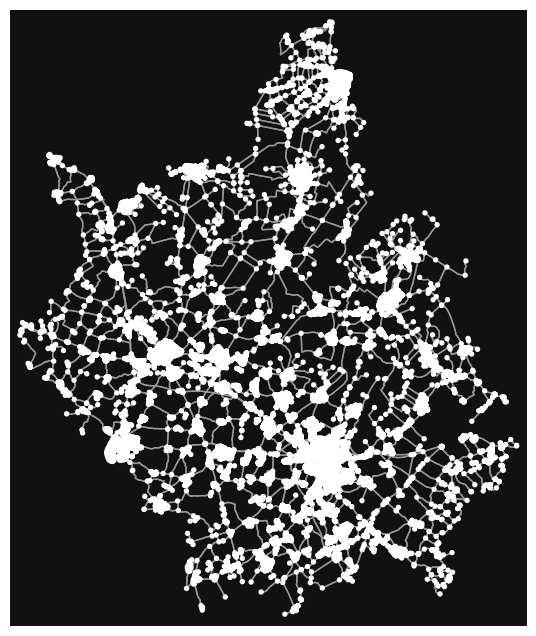

2023-04-13 15:15:36 Finished plotting the graph


(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [39]:
ox.plot_graph(G)

In [ ]:
#hospital_data()

In [40]:
filtered_df = hospital
filtered_df

,Name,Address,City,County,Latitude,Longitude
0,"Nuffield Health, Cambridge Hospital","Nuffield Health Cambridge Hospital,4 Trumpingt...",Cambridge,Cambridgeshire,52.190353,0.123559
1,Spire Cambridge Lea Hospital,"30 New Road,Impington,",Cambridge,Cambridgeshire,52.244762,0.113379
2,Royal Papworth Hospital,"Royal Papworth Hospital,Cambridge Biomedical C...",Cambridge,Cambridgeshire,52.172386,0.136190
3,Addenbrooke'S,",Hills Road,",Cambridge,Cambridgeshire,52.175133,0.140753
4,Rosie Hospital,",Robinson Way,",Cambridge,Cambridgeshire,52.173264,0.139423
5,Brookfields Hospital,",351 Mill Road,",Cambridge,Cambridgeshire,52.197124,0.150817
6,Ida Darwin Hospital,"Cambridge Road,Fulbourn,",Cambridge,Cambridgeshire,52.185581,0.200365


In [41]:

city_or_county = filtered_df['City'][0]
city_or_county


'Cambridge'

In [42]:
filtered_df['Addresses']= filtered_df['Name']+ filtered_df['Address']
addresses=filtered_df['Addresses']

In [43]:
# produce list of coordinates from addresses/df 

use_long_lat = 'Longitude' in filtered_df.columns and 'Latitude' in filtered_df.columns

coords = []

for _, row in filtered_df.iterrows():
    try:
        if use_long_lat:
            coord = (row['Latitude'], row['Longitude'])
        else:
            location = geolocator.geocode(row['Address'])
            coord = (location.latitude, location.longitude)
        coords.append(coord)
    except Exception as e:
        print(f"Error: {e}")
        pass

print(coords)

[(52.19035339355469, 0.1235585957765579), (52.2447624206543, 0.1133785024285316), (52.1723861694336, 0.1361896246671676), (52.17513275146485, 0.1407532393932342), (52.17326354980469, 0.1394228637218475), (52.19712448120117, 0.1508167535066604), (52.18558120727539, 0.2003648728132248)]


In [ ]:
'''from itertools import combinations

distance_dict = {}
for coord_pair in combinations(coords, 2):
    coord1, coord2 = coord_pair
    node1 = ox.distance.nearest_nodes(G, X=[coord1[1]], Y=[coord1[0]])[0]
    node2 = ox.distance.nearest_nodes(G, X=[coord2[1]], Y=[coord2[0]])[0]
    distance = nx.shortest_path_length(G, node1, node2, weight='length')
    distance_dict[(coord1, coord2)] = distance
    distance_dict[(coord2, coord1)] = distance  
'''

In [44]:
from itertools import combinations
distance_dict = {}
for coord_pair in combinations(coords, 2):
    coord1, coord2 = coord_pair
    if coord1 == coord2:
        continue
    node1 = ox.distance.nearest_nodes(G, X=[coord1[1]], Y=[coord1[0]])[0]
    node2 = ox.distance.nearest_nodes(G, X=[coord2[1]], Y=[coord2[0]])[0]
    distance = nx.shortest_path_length(G, node1, node2, weight='length')
    distance_dict[(coord1, coord2)] = distance
    distance_dict[(coord2, coord1)] = distance




2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:37 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:38 Created nodes GeoDataFrame from graph
2023-04-13 15:15:39 Created nodes GeoDataFrame from graph
2023-04-13 15:15:39 Created nodes GeoDataFrame from graph
2023-04-13 15:15:39 Created nodes GeoDataFrame from graph
2023-04-13 15:15:39 Created nodes GeoDataFrame from graph
2023-04-13 15:15:39 Created nodes GeoDataFrame from graph
2023-04-13 15:

In [45]:
distance_dict

{((52.19035339355469, 0.1235585957765579),
  (52.2447624206543, 0.1133785024285316)): 7012.717000000001,
 ((52.2447624206543, 0.1133785024285316),
  (52.19035339355469, 0.1235585957765579)): 7012.717000000001,
 ((52.19035339355469, 0.1235585957765579),
  (52.1723861694336, 0.1361896246671676)): 4480.438,
 ((52.1723861694336, 0.1361896246671676),
  (52.19035339355469, 0.1235585957765579)): 4480.438,
 ((52.19035339355469, 0.1235585957765579),
  (52.17513275146485, 0.1407532393932342)): 4754.793000000001,
 ((52.17513275146485, 0.1407532393932342),
  (52.19035339355469, 0.1235585957765579)): 4754.793000000001,
 ((52.19035339355469, 0.1235585957765579),
  (52.17326354980469, 0.1394228637218475)): 4754.793000000001,
 ((52.17326354980469, 0.1394228637218475),
  (52.19035339355469, 0.1235585957765579)): 4754.793000000001,
 ((52.19035339355469, 0.1235585957765579),
  (52.19712448120117, 0.1508167535066604)): 2964.2049999999995,
 ((52.19712448120117, 0.1508167535066604),
  (52.19035339355469, 0.

In [ ]:
'''
import itertools
import math

def haversine_distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371  # Earth radius in km

    d_lat = math.radians(lat2 - lat1)
    d_lon = math.radians(lon2 - lon1)

    a = (math.sin(d_lat / 2) * math.sin(d_lat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(d_lon / 2) * math.sin(d_lon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Create a distance_dict
distance_dict = {}
for coord1, addr1 in zip(coords, addresses):
    for coord2, addr2 in zip(coords, addresses):
        if addr1 != addr2:
            distance = haversine_distance(coord1, coord2)
            distance_dict[(addr1, addr2)] = distance
            distance_dict[(addr2, addr1)] = distance
            '''

In [ ]:
# thius worksbut not with first address
'''
def tsp(coords, addresses, distance_dict):
    shortest_distance = float('inf')
    shortest_route = None
    coord_to_address = dict(zip(coords, addresses))
    for route in itertools.permutations(coords):
        route_distance = 0
        for i in range(len(route)):
            if i == len(route) - 1:
                route_distance += distance_dict[(route[i], route[0])]
            else:
                route_distance += distance_dict[(route[i], route[i + 1])]
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route
    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]
    shortest_route_coords = [coord for coord in shortest_route]
    return shortest_route_addresses, shortest_route_coords, shortest_distance
'''


In [46]:
addresses=filtered_df.Address
addresses

0    Nuffield Health Cambridge Hospital,4 Trumpingt...
1                               30 New Road,Impington,
2    Royal Papworth Hospital,Cambridge Biomedical C...
3                                         ,Hills Road,
4                                       ,Robinson Way,
5                                      ,351 Mill Road,
6                             Cambridge Road,Fulbourn,
Name: Address, dtype: object

In [47]:

# tsp permutations code

def tsp(coords, addresses, distance_dict, first_address=None):
    shortest_distance = float('inf')
    shortest_route = None
    coord_to_address = dict(zip(coords, addresses))
    
    if first_address:
        if first_address not in addresses:
            raise ValueError("The specified first_address is not in the list of addresses.")
        first_coord = list(coord_to_address.keys())[list(coord_to_address.values()).index(first_address)]
        coords.remove(first_coord)
        permutations = (tuple([first_coord] + list(route)) for route in itertools.permutations(coords))
    else:
        permutations = itertools.permutations(coords)

    for route in permutations:
        route_distance = 0
        for i in range(len(route)):
            if i == len(route) - 1:
                route_distance += distance_dict[(route[i], route[0])]
            else:
                route_distance += distance_dict[(route[i], route[i + 1])]
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route
    
    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]
    shortest_route_coords = [coord for coord in shortest_route]
    
    return shortest_route_addresses, shortest_route_coords, shortest_distance




'\n\n    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]\n    \n    return shortest_route_addresses, shortest_route_coords, shortest_distance\n'

In [ ]:
# greedy algorithm code

def tsp_greedy(coords, addresses, distance_dict, first_address=None):
    if first_address:
        first_coord = coords[addresses.index(first_address)]
    else:
        first_coord = coords[0]
        first_address = addresses[0]

    remaining_coords = [coord for coord in coords if coord != first_coord]
    remaining_addresses = [address for address in addresses if address != first_address]

    shortest_route_coords_g = [first_coord]
    shortest_route_addresses_g = [first_address]
    shortest_distance_g = 0

    while remaining_coords:
        current_coord = shortest_route_coords_g[-1]
        min_distance = float("inf")
        next_coord = None
        next_address = None

        for coord, address in zip(remaining_coords, remaining_addresses):
            distance = distance_dict[(current_coord, coord)]
            if distance < min_distance:
                min_distance = distance
                next_coord = coord
                next_address = address

        shortest_route_coords_g.append(next_coord)
        shortest_route_addresses_g.append(next_address)
        shortest_distance_g += min_distance
        remaining_coords.remove(next_coord)
        remaining_addresses.remove(next_address)

    return shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g


In [48]:
# running tsp permutations
shortest_route_addresses, shortest_route_coords,shortest_distance = tsp(coords, addresses, distance_dict,first_address=None)


In [ ]:

# Run tsp_greedy and tsp
shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g= tsp_greedy(coords, addresses, distance_dict, first_address=None)


In [ ]:
#testing first address functionality.

addresses=list(filtered_df['Address'])
user_first_address =  addresses[0]
shortest_route_addresses, shortest_route_coords,shortest_distance = tsp(coords, addresses, distance_dict,first_address=user_first_address)
addresses

In [49]:


# Find the nearest nodes for each coordinate in the shortest route
nodes = [ox.distance.nearest_nodes(G, X=[coord[1]], Y=[coord[0]])[0] for coord in shortest_route_coords]


# Calculate the shortest paths between each pair of consecutive nodes
shortest_paths = [nx.shortest_path(G, nodes[i], nodes[i + 1], weight='length') for i in range(len(nodes) - 1)]
path_lengths = [nx.shortest_path_length(G, nodes[i], nodes[i + 1], weight='length')/1609.34 for i in range(len(nodes) - 1)]



2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph
2023-04-13 15:16:11 Created nodes GeoDataFrame from graph


In [50]:
sum(path_lengths)

16.520384753998535

In [58]:
# doing the tsp_greedy conversion to nodes and network distance
nodes_g = [ox.distance.nearest_nodes(G, X=[coord[1]], Y=[coord[0]])[0] for coord in shortest_route_coords_g]

shortest_paths_g = [nx.shortest_path(G, nodes_g[i], nodes_g[i + 1], weight='length') for i in range(len(nodes_g) - 1)]
path_lengths_g = [nx.shortest_path_length(G, nodes_g[i], nodes_g[i + 1], weight='length') / 1609.34 for i in range(len(nodes_g) - 1)]



2023-04-13 16:22:45 Created nodes GeoDataFrame from graph
2023-04-13 16:22:46 Created nodes GeoDataFrame from graph
2023-04-13 16:22:46 Created nodes GeoDataFrame from graph
2023-04-13 16:22:46 Created nodes GeoDataFrame from graph
2023-04-13 16:22:46 Created nodes GeoDataFrame from graph
2023-04-13 16:22:46 Created nodes GeoDataFrame from graph
2023-04-13 16:22:47 Created nodes GeoDataFrame from graph


In [59]:
sum(path_lengths_g)

18.081655212695892

In [60]:
# Find the shortest path and cumulative distance
if sum(path_lengths) < sum(path_lengths_g):
    shortest_paths = shortest_paths
    shortest_route_addresses=shortest_route_addresses
    shortest_route_coords=shortest_route_coords
else:
    shortest_paths = shortest_paths_g
    shortest_route_addresses=shortest_route_addresses_g
    shortest_route_coords=shortest_route_coords_g


In [61]:
import folium

# Create a map centered on the first address in the shortest route
map_centre = shortest_route_coords[0]
m = folium.Map(location=map_centre, max_bounds=True)


# Add markers for each address in the shortest route
for i, (address, coord) in enumerate(zip(shortest_route_addresses, shortest_route_coords)):
    tooltip = f"{i+1}. {address}"
    folium.Marker(location=coord, tooltip=tooltip).add_to(m)

# Draw the shortest paths on the map
for path in shortest_paths:
    route_nodes_coords = [G.nodes[node] for node in path]
    route_coords = [(node['y'], node['x']) for node in route_nodes_coords]
    folium.PolyLine(route_coords, color='blue', weight=2.5).add_to(m)

# Display the map
m

In [62]:
distance_data = {
    'From': shortest_route_addresses[:-1],
    'To': shortest_route_addresses[1:],
    'Distance (miles)': [round(dist,2) for dist in path_lengths],
    'Cumulative Distance (miles)': [round(sum(path_lengths[:i+1]),2) for i in range(len(path_lengths))]
}
df = pd.DataFrame(distance_data)
df

,From,To,Distance (miles),Cumulative Distance (miles)
0,"Nuffield Health Cambridge Hospital,4 Trumpingt...","Royal Papworth Hospital,Cambridge Biomedical C...",2.78,2.78
1,"Royal Papworth Hospital,Cambridge Biomedical C...",",Hills Road,",0.39,3.17
2,",Hills Road,",",Robinson Way,",0.00,3.17
3,",Robinson Way,","Cambridge Road,Fulbourn,",5.54,8.72
4,"Cambridge Road,Fulbourn,",",351 Mill Road,",3.21,11.93
5,",351 Mill Road,","30 New Road,Impington,",4.59,16.52


In [ ]:
# old tsp code
'''
import itertools

def distance(coord1, coord2):
    # Calculates the Euclidean distance between two coords
    x1, y1 = coord1
    x2, y2 = coord2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


def manhattan_distance(coord1, coord2):
    # Calculates the Manhattan distance between two coords
    x1, y1 = coord1
    x2, y2 = coord2
    return abs(x1 - x2) + abs(y1 - y2)



def tsp(coords, addresses, distance_dict):
    shortest_distance = float('inf')
    shortest_route = None
    coord_to_address = dict(zip(coords, addresses))
    for route in itertools.permutations(coords):
        route_distance = 0
        for i in range(len(route)):
            if i == len(route) - 1:
                route_distance += distance_dict[(route[i], route[0])]
            else:
                route_distance += distance_dict[(route[i], route[i + 1])]
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route
    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]
    shortest_route_coords = [coord for coord in shortest_route]
    return shortest_route_addresses, shortest_route_coords, shortest_distance
'''